1. Word Vector Retrieval:

The get_word_vector(word) function retrieves the vector representation of a word from the pre-trained Word2Vec model, if the word exists in the vocabulary.

2. Analogy Calculation:

The analogy(word1, word2, word3, top_n=5) function implements the analogy formula: word1 - word2 + word3 ≈ ?
For example, "king - man + woman ≈ queen".
It converts the words to lowercase, performs the analogy calculation using the most_similar function in the Word2Vec model, and retrieves the top n most similar words.
The result is printed, showing the analogy in the format word1 - word2 + word3 = top_word.

3. Random Words from Spacy Vocabulary:

The get_random_spacy_words(n=20) function randomly selects n words from the Spacy vocabulary that have vector representations (i.e., they are meaningful words and not punctuation, etc.).

4. Duplicate Removal:

The remove_duplicates(word_list) function ensures there are no duplicate words when combining the analogy words and random words for plotting.

5. t-SNE Plotting:

The plot_tsne(words, word_vectors, analogy_words, top_word) function plots the words using t-SNE:
It reduces the high-dimensional word vectors into 2D space.
It then plots each word, and for the words involved in the analogy, it draws red lines connecting them in sequence.
This helps visualize the relationships between the words, especially for the analogy calculation.

7. Running Analogy and Visualization:

The run_analogy_and_plot(word1, word2, word3) function:
Runs the analogy calculation for the given three words.
Retrieves the top n similar words from Word2Vec.
Collects random words from the Spacy vocabulary.
Prepares all the words (removes duplicates) and their corresponding vectors for visualization.
Calls plot_tsne to visualize the words in a 2D plot.

Loading Word2Vec pre-trained model...
king - man + woman = Queen


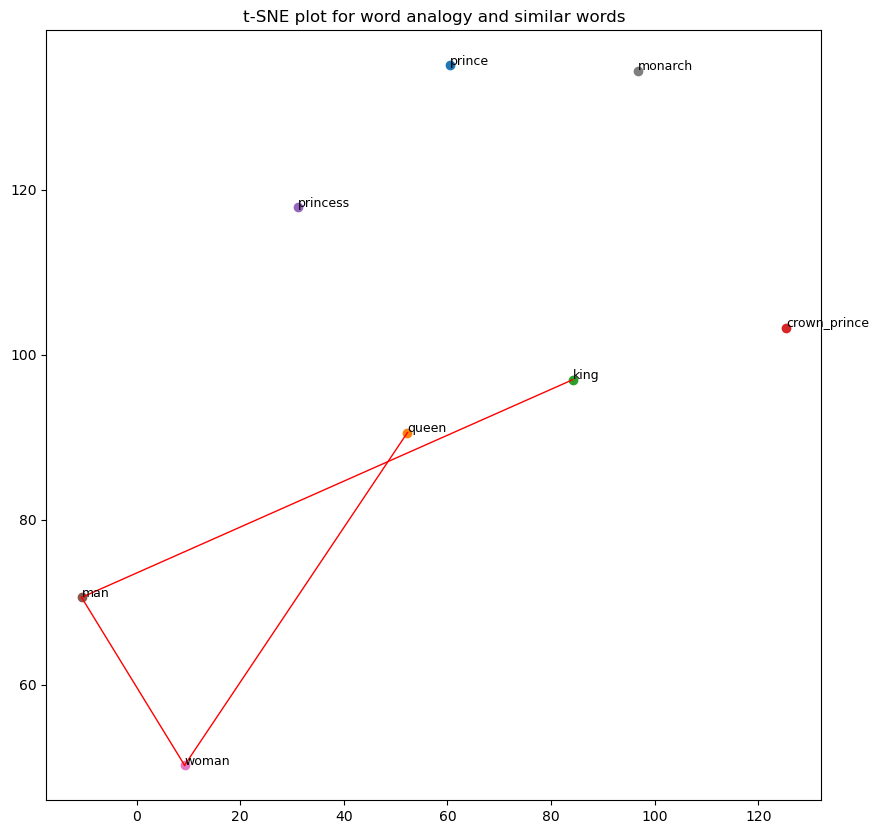

doctor - man + woman = Gynecologist


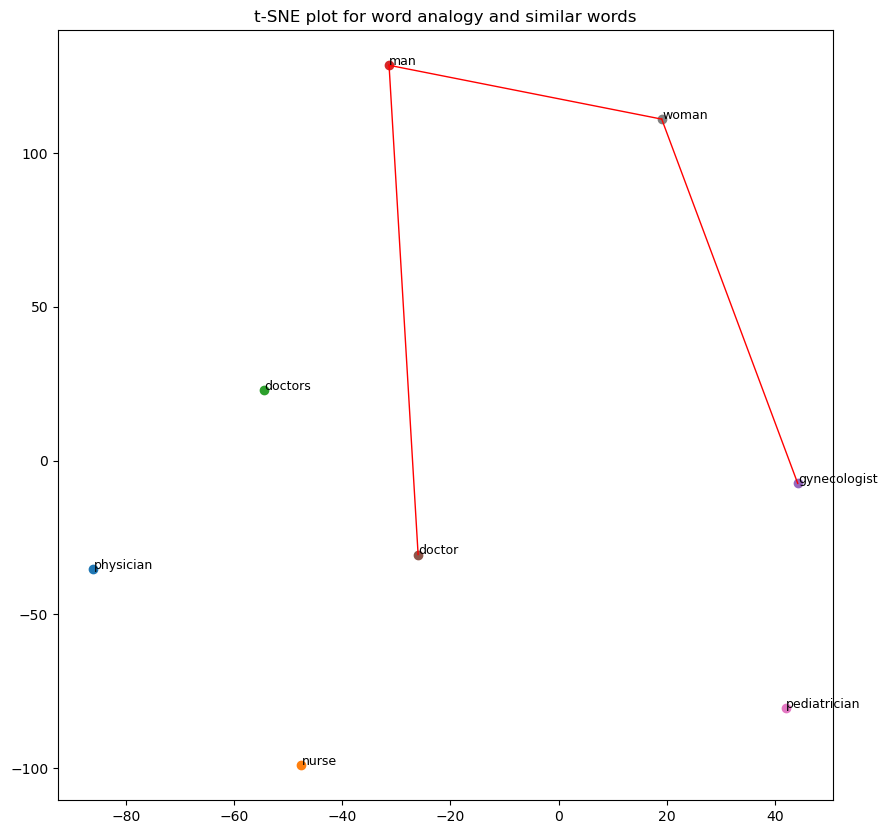

france - italy + rome = Paris


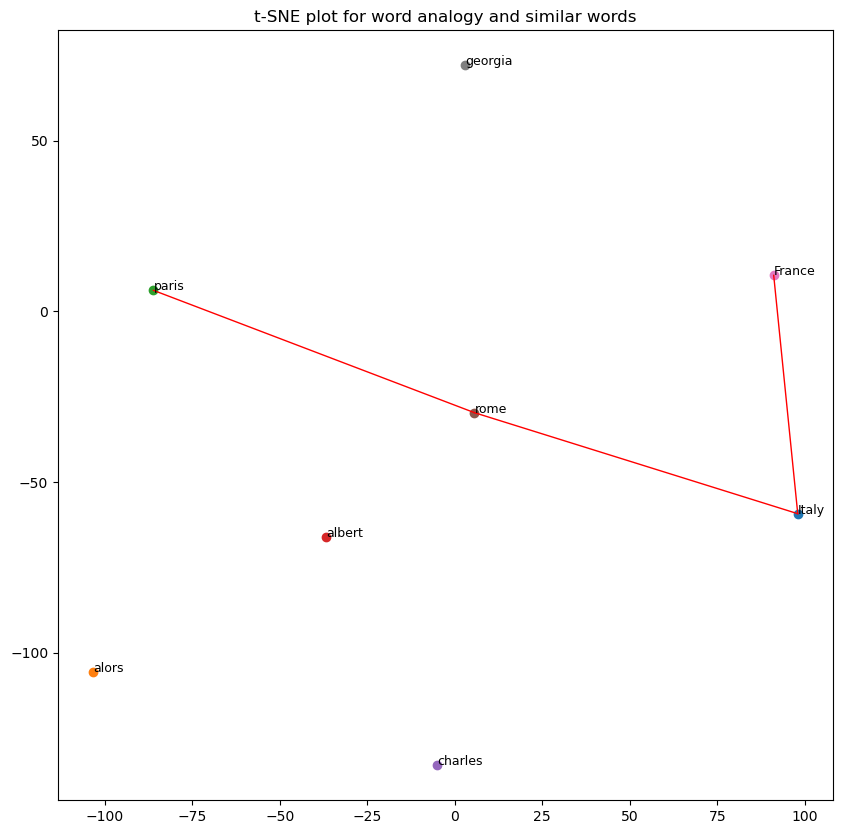

florida - texas + austin = Miami


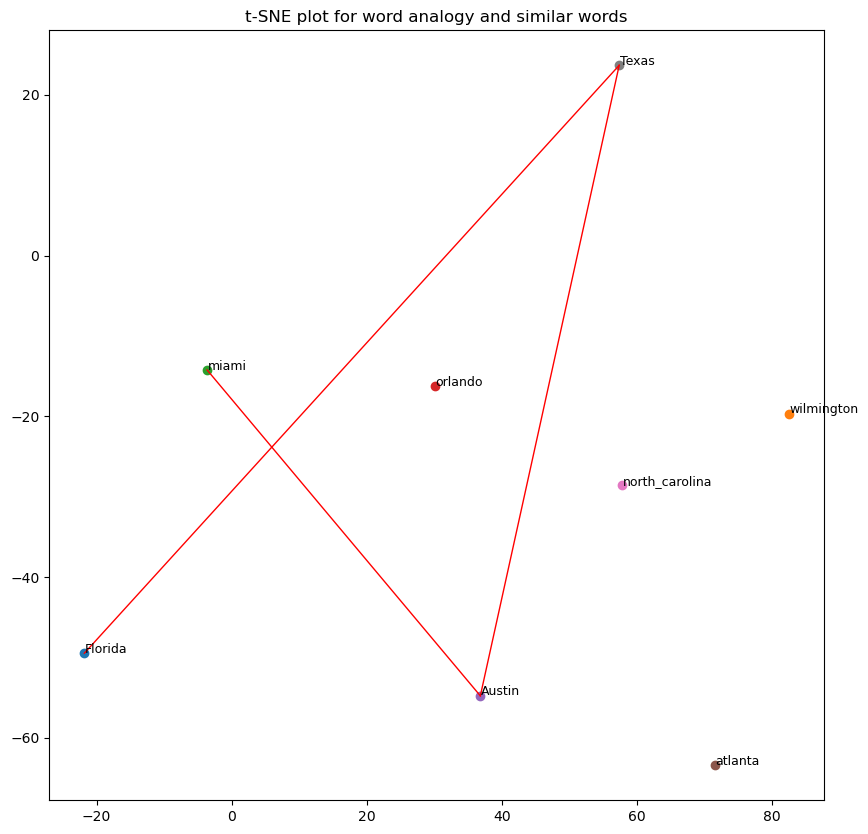

In [1]:
import gensim.downloader as api
import spacy
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import defaultdict
from matplotlib.lines import Line2D

# Load Spacy's small English language model
nlp = spacy.load('en_core_web_sm')

# Load the Word2Vec Google News pre-trained model
print("Loading Word2Vec pre-trained model...")
model = api.load('word2vec-google-news-300')

def get_word_vector(word):
    """Get the word vector for a given word using the pre-trained model."""
    return model[word] if word in model else None

def analogy(word1, word2, word3, top_n=5):
    """Calculate the word analogy: word1 - word2 + word3 ≈ ? (All lowercase)."""
    # Convert words to lowercase
    word1, word2, word3 = word1.lower(), word2.lower(), word3.lower()
    
    # Calculate analogy result
    result = model.most_similar(positive=[word1, word3], negative=[word2], topn=top_n)
    
    # Get the top most similar word
    top_word = result[0][0]
    
    # Print the analogy in the required format
    print(f"{word1} - {word2} + {word3} = {top_word.capitalize()}")
    
    return result

def get_random_spacy_words(n=20):
    """Get a list of n random words from Spacy's vocabulary."""
    vocab_words = [str(word) for word in nlp.vocab if word.is_alpha and word.has_vector]
    # Ensure n is not larger than the number of available words
    n = min(n, len(vocab_words)) 
    return random.sample(vocab_words, n)

def remove_duplicates(word_list):
    """Remove duplicate words from the word list."""
    return list(set(word_list))

def plot_tsne(words, word_vectors, analogy_words, top_word):
    """Plot the t-SNE graph for the given words and their vectors."""
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    vectors_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    
    # Plot words
    for i, word in enumerate(words):
        x, y = vectors_2d[i, 0], vectors_2d[i, 1]
        plt.scatter(x, y)
        plt.text(x + 0.05, y + 0.05, word, fontsize=9)
    
    # Draw a line between the 4 analogy words
    analogy_indices = [words.index(word) for word in analogy_words + [top_word]]
    for i in range(len(analogy_indices) - 1):
        x_values = [vectors_2d[analogy_indices[i], 0], vectors_2d[analogy_indices[i+1], 0]]
        y_values = [vectors_2d[analogy_indices[i], 1], vectors_2d[analogy_indices[i+1], 1]]
        plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=1)

    plt.title("t-SNE plot for word analogy and similar words")
    plt.show()

def run_analogy_and_plot(word1, word2, word3):
    """Run analogy, retrieve top similar words, and plot them with t-SNE."""
    # Calculate the analogy and print it
    top_similar_words = analogy(word1, word2, word3)
    top_word = top_similar_words[0][0]  # Get the top word
    top_5_words = [word for word, _ in top_similar_words]
    
    # Get random words from Spacy
    random_words = get_random_spacy_words()
    
    # Collect all words to plot (analogy words + top 5 similar + random words)
    words = remove_duplicates([word1, word2, word3, top_word] + top_5_words + random_words)
    
    # Get word vectors for all words
    word_vectors = [get_word_vector(word.lower()) for word in words]
    word_vectors = np.array([wv for wv in word_vectors if wv is not None])
    
    # Plot t-SNE
    plot_tsne(words, word_vectors, [word1, word2, word3], top_word)

# Run analogies and plot the results
run_analogy_and_plot('king', 'man', 'woman')
run_analogy_and_plot('doctor', 'man', 'woman')
run_analogy_and_plot('France', 'Italy', 'rome')
run_analogy_and_plot('Florida', 'Texas', 'Austin')


# Explanation of the Process:


Word Embeddings: Word2Vec embeddings represent words in a vector space where words with similar meanings are close to each other. This allows analogy operations like king - man + woman = queen to work by manipulating these vectors mathematically.

t-SNE: t-SNE is a dimensionality reduction algorithm that maps high-dimensional data (like 300-dimensional word vectors) into two dimensions for visualization. This helps in plotting word relationships.

Word Analogy: By subtracting one word vector from another and adding a third, the model finds the closest word that satisfies the analogy. For example, the relationship between "king" and "man" is similar to the relationship between "queen" and "woman."

Visualization: t-SNE reduces these complex word relationships into a 2D space, and the code visualizes how the model interprets the relationship between words, including the results of the analogy.